In [72]:
import cv2
import pickle
import pandas as pd
import os
import sys
import matplotlib.pyplot as plt
import numpy as np
from skspatial.objects import Plane, Points
from skspatial.plotting import plot_3d


In [4]:
path_current = os.path.dirname(os.path.abspath('__file__'))
sys.path.append(os.path.split(path_current)[0])

from app_sys import AppSys
from utils_predict import standardize_fsize_coord_conversion, standardize_fsize

app_sys = AppSys()

# 1. Load kp coords

The coordinates recorded on tkinter canvas for squared (640x640) image

In [5]:
direc = os.path.join(app_sys.PATH_ASSET, 'concept_test')

In [6]:
os.listdir(direc)

['img1.pkl', 'img0.pkl', 'kp1.pkl', 'kp0.pkl']

In [7]:
direc_img = pickle.load(open(os.path.join(direc,'img0.pkl'), 'rb'))
kp = pickle.load(open(os.path.join(direc,'kp0.pkl'), 'rb'))

In [8]:
print(direc_img)
direc_img_depth = direc_img.replace('original', 'depth')
print(direc_img_depth)

/workspaces/MoonClimbers/app/asset/prep_kp/temp/1StarChoss_trimmed_masked_0_original.jpg
/workspaces/MoonClimbers/app/asset/prep_kp/temp/1StarChoss_trimmed_masked_0_depth.jpg


# 2. Depth information

In [9]:
depth_array = np.load(os.path.join(app_sys.PATH_ASSET_DEPTH, '1StarChoss_trimmed_depths.npz'))
depth_array

NpzFile '/workspaces/MoonClimbers/app/asset/depth/1StarChoss_trimmed_depths.npz' with keys: depths

frame numbers, height, width

In [10]:
depth_array['depths'].shape

(654, 1280, 720)

The closer the larger the values -> the inverse distance is recorded

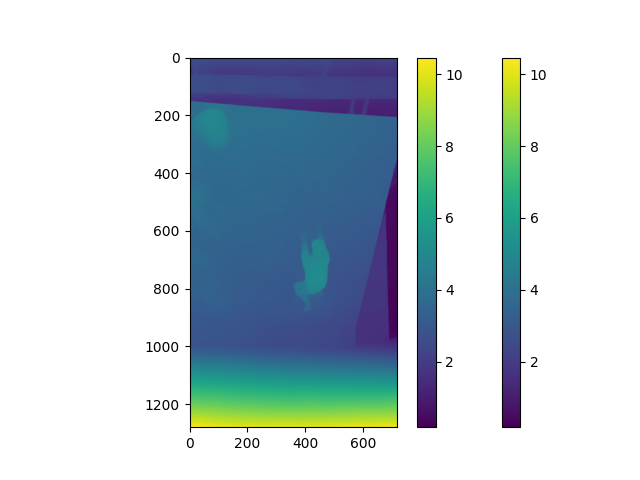

Max: 10.462610244750977, Min: 0.17370057106018066


In [45]:
plt.imshow(depth_array['depths'][0,:,:])
plt.colorbar()
plt.show()
print(f"Max: {depth_array['depths'][0,:,:].max()}, Min: {depth_array['depths'][0,:,:].min()}")

# 3. KP coordinates conversion from the square frame to the original frame

In [ ]:
df_sq = pd.DataFrame(index=kp.get_node_names(), columns=['X', 'Y', 'Z'])
df_sq = df_sq.astype(float)
for key in df_sq.index:
    df_sq.loc[key, ['X', 'Y']] = kp.get_node_coords(key)

## Coordinates of the KPs on the square frame

In [65]:
df_sq

,X,Y,Z
A1,180,362,NaN
A4,181,325,NaN
A8,181,277,NaN
A11,182,236,NaN
A14,183,190,NaN
A18,184,118,NaN
C4,210,328,NaN
C6,211,304,NaN
C9,215,265,NaN
C12,217,221,NaN


In [ ]:
# img = cv2.imread(direc_img)
# img_depth = cv2.imread(direc_img_depth)
# img_depth.shape

## Coordinates of the KPs on the original video frames

Save the depth information

In [68]:
video = cv2.VideoCapture('/workspaces/MoonClimbers/app/asset/depth/1StarChoss_trimmed_vis.mp4')
video.set(cv2.CAP_PROP_POS_FRAMES, 0)
res, frame = video.read()

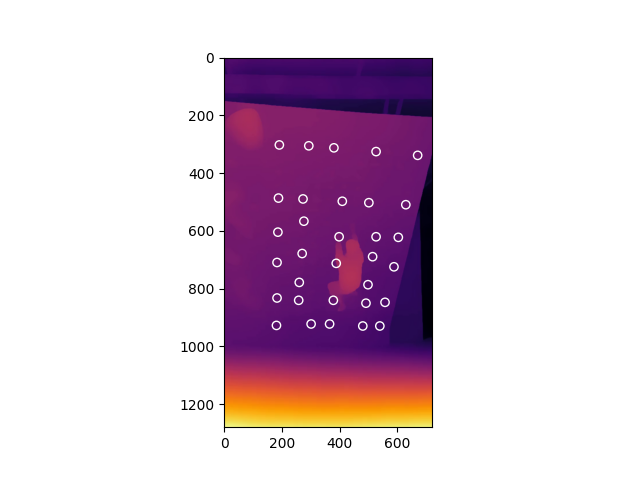

In [ ]:
fig, ax = plt.subplots()
frame_depth = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
ax.imshow(frame_depth)

df = df_sq.copy()
# DF of the depth value
for k in df_sq.index:
    xx, yy = df_sq.loc[k, ['X', 'Y']]
    # Coordinates before reshaping the frame to 640x640
    x, y = standardize_fsize_coord_conversion(os.path.join(app_sys.PATH_ASSET_DEPTH, '1StarChoss_trimmed_vis.mp4'), 640, (xx/500*640,yy/500*640))
    ax.scatter(int(x), int(y), facecolors='none', color='white')
    # values need to be inverted as they are likely inverse depth for visualisation purpose
    z = 1/(depth_array['depths'][0,y,x] + 1e-9) * 1000
    df.loc[k, ['X', 'Y', 'Z']] = (x,y,z)


In [70]:
df

,X,Y,Z
A1,181,927,351.897681
A4,183,832,319.867169
A8,183,709,301.01853
A11,186,604,284.308129
A14,188,486,271.009237
A18,191,302,253.646294
C4,258,840,328.26521
C6,260,778,322.211046
C9,270,678,292.029658
C12,276,566,282.983449


# 4. 3D visualisation of the KPs

In [19]:
dict_col = {
    'A':'red',
    'C':'orange',
    'D':'yellow',
    'E':'green',
    'F':'green',
    'H':'blue',
    'I':'navy',
    'K':'purple',
    }

Text(0.5, 0, 'Z')

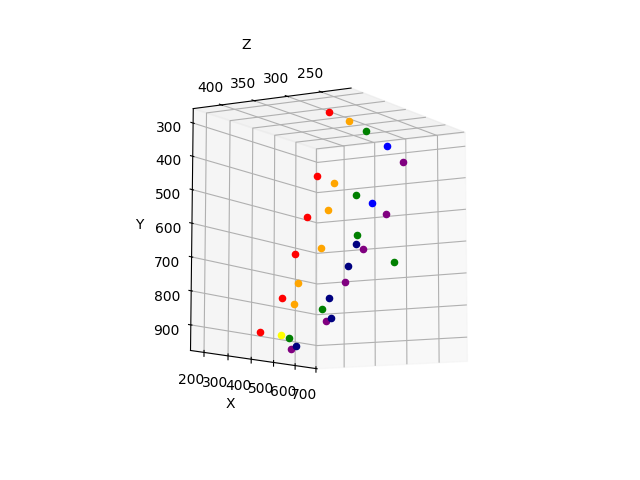

In [92]:
fig = plt.figure()
ax = plt.axes(projection='3d')
# ax.invert_zaxis()
ax.view_init(elev=-30, azim=170, roll=95)
for k in df.index:
    x, y, z = df.loc[k, ['X', 'Y', 'Z']]
    ax.scatter(x, y, z, c=dict_col[k[0]])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# 5. Get the best fit plane

(<Figure size 640x480 with 1 Axes>, <Axes3D: >)

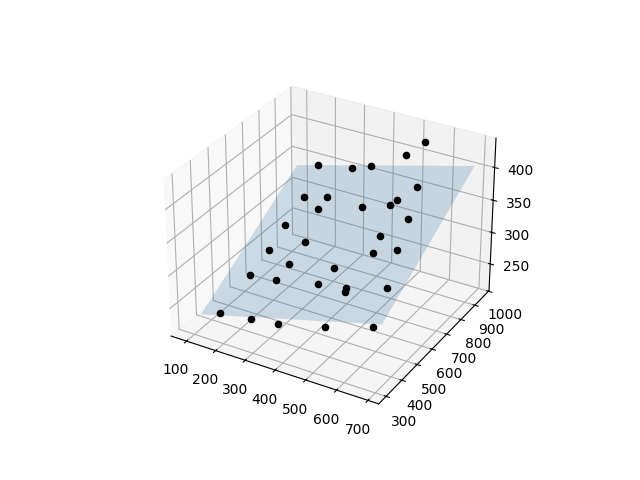

In [93]:
points = Points(df.astype(float))
plane = Plane.best_fit(points)

plot_3d(
    points.plotter(c='black', s=20, depthshade=False),
    plane.plotter(alpha=0.2, lims_x=(-300, 300), lims_y=(-300, 300)),
)

# 6.  Projection of the KPs on the best fit plane

/home/vscode/.local/lib/python3.10/site-packages/skspatial/plotting.py:118: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure()


(<Figure size 640x480 with 1 Axes>, <Axes3D: >)

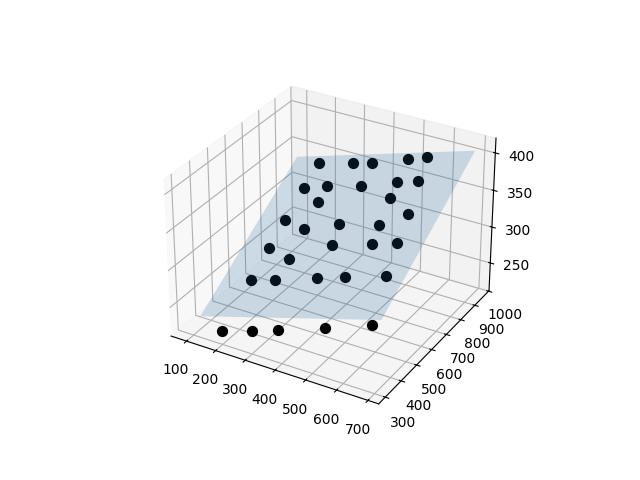

In [81]:
points2 = plane.project_points(df.astype(float))
plot_3d(
    points2.plotter(c='k', s=50, depthshade=False),
    plane.plotter(alpha=0.2, lims_x=(-300, 300), lims_y=(-300, 300)),
)

In [89]:
df_fit = pd.DataFrame(points2, index=df.index, columns=df.columns)
df_fit

,X,Y,Z
A1,182.364555,929.102221,340.487455
A4,182.679856,831.506789,322.544173
A8,183.114854,709.176943,300.058136
A11,186.374518,604.576980,281.176456
A14,189.310283,488.018610,260.052824
A18,194.156023,306.862141,227.256048
C4,257.446530,839.147329,332.893251
C6,260.031740,778.048899,321.945638
C9,268.553948,675.772226,304.121352
C12,275.794196,565.682939,284.704359


Text(0.5, 0, 'Z')

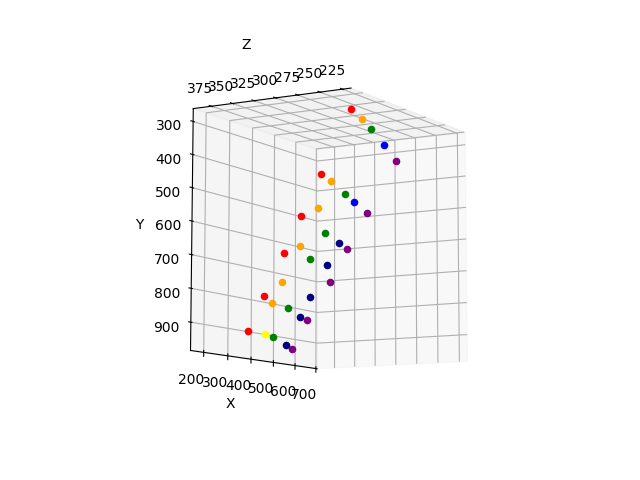

In [91]:
fig = plt.figure()
ax = plt.axes(projection='3d')
# ax.invert_zaxis()
ax.view_init(elev=-30, azim=170, roll=95)
for k in df.index:
    x, y, z = df_fit.loc[k, ['X', 'Y', 'Z']]
    ax.scatter(x, y, z, c=dict_col[k[0]])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')